In [2]:
import matplotlib.pyplot as plt
import pandas as pd



file_path = "Sales_Transactions.csv" # Specify the file path



data = pd.read_csv(file_path) # Read the CSV file



data['Revenue'] = data['Unit_Price'] * data['Quantity_Sold'] #Calculate revenue for each column
print(data.head(10)) # Display the first few rows of the data

  Transaction_ID Customer_Name     Product     Category  Quantity_Sold  \
0          T0001    Customer_7      Tablet  Electronics              3   
1          T0002   Customer_20  Headphones  Electronics              5   
2          T0003   Customer_15      Tablet  Electronics              2   
3          T0004   Customer_11      Tablet  Electronics              2   
4          T0005    Customer_8      Laptop  Electronics              3   
5          T0006    Customer_7      Tablet  Electronics              2   
6          T0007   Customer_19  Smartwatch  Electronics              1   
7          T0008   Customer_11      Tablet  Electronics              5   
8          T0009   Customer_11      Laptop  Electronics              4   
9          T0010    Customer_4  Smartwatch  Electronics              2   

   Unit_Price Transaction_Date Store_Location  Revenue  
0         657       2023-01-01       New York     1971  
1         818       2023-01-02        Houston     4090  
2         374 

In [80]:
#Check if the are null values in the dataset
print(data.isnull().sum())

# Assuming your CSV is loaded like this
# data = pd.read_csv('your_file.csv')

# 1. Check for Uniqueness in 'Transaction_ID'
is_unique = data['Transaction_ID'].is_unique  # Check if all IDs are unique
if is_unique:
    print("All Transaction IDs are unique.")
else:
    duplicates = data[data['Transaction_ID'].duplicated()]
    print("Duplicate Transaction IDs found:")
    print(duplicates)

# 2. Validate Cities in the 'City' Column
allowed_cities = {'Chicago', 'Houston', 'New York', 'Phoenix', 'Los Angeles'}
unique_cities = set(data['Store_Location'].unique())  # Get unique cities in the column

if unique_cities.issubset(allowed_cities):
    print("All cities in the 'City' column are valid.")
else:
    invalid_cities = unique_cities - allowed_cities
    print(f"Invalid cities found in the 'City' column: {invalid_cities}")

# 3. Validate 'Category' Column
allowed_categories = {'Electronics', 'Accessories'}
unique_categories = set(data['Category'].unique())

if unique_categories.issubset(allowed_categories):
    print("All categories are valid.")
else:
    invalid_categories = unique_categories - allowed_categories
    print(f"Invalid categories found: {invalid_categories}")

# 4. Check if 'Quantity_Sold' is an Integer
if pd.api.types.is_integer_dtype(data['Quantity_Sold']):
    print("'Quantity_Sold' is an integer.")
else:
    print("'Quantity_Sold' is not an integer. Check for incorrect values.")

# 5. Validate 'Product' Column
allowed_products = {'Tablet', 'Laptop', 'Smartphone', 'Smartwatch', 'Headphones'}
unique_products = set(data['Product'].unique())

if unique_products.issubset(allowed_products):
    print("All products are valid.")
else:
    invalid_products = unique_products - allowed_products
    print(f"Invalid products found: {invalid_products}")

# 6. Check if 'Transaction_Date' is in Date Format
try:
    data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
    print("'Transaction_Date' is in the correct date format.")
except ValueError:
    print("'Transaction_Date' contains invalid date formats. Check your data.")

# 7. Check if 'Unit_Price' is a Float
if pd.api.types.is_float_dtype(data['Unit_Price']):
    print("'Unit_Price' is a float.")
else:
    print("'Unit_Price' is not a float. Check for incorrect values.")
    # Convert 'Unit_Price' to float
    data['Unit_Price'] = pd.to_numeric(data['Unit_Price'], errors='coerce')



# Display the datatypes of each column
print(data.dtypes)
# Convert 'Revenue' and 'Unit_Price' to float explicitly
data['Revenue'] = data['Revenue'].astype(float)
data['Unit_Price'] = data['Unit_Price'].astype(float)

# Check and confirm conversion
if data['Revenue'].dtype == 'float64':
    print("The 'Revenue' column has been successfully converted to float.")
else:
    print("The 'Revenue' column conversion failed or is not of type float.")

if data['Unit_Price'].dtype == 'float64':
    print("The 'Unit_Price' column has been successfully converted to float.")
else:
    print("The 'Unit_Price' column conversion failed or is not of type float.")


# Display the datatypes of each column
print(data.dtypes)

Transaction_ID      0
Customer_Name       0
Product             0
Category            0
Quantity_Sold       0
Unit_Price          0
Transaction_Date    0
Store_Location      0
Revenue             0
dtype: int64
All Transaction IDs are unique.
All cities in the 'City' column are valid.
All categories are valid.
'Quantity_Sold' is an integer.
All products are valid.
'Transaction_Date' is in the correct date format.
'Unit_Price' is not a float. Check for incorrect values.
Transaction_ID              object
Customer_Name               object
Product                     object
Category                    object
Quantity_Sold                int64
Unit_Price                   int64
Transaction_Date    datetime64[ns]
Store_Location              object
Revenue                      int64
dtype: object
The 'Revenue' column has been successfully converted to float.
The 'Unit_Price' column has been successfully converted to float.
Transaction_ID              object
Customer_Name               objec

In [81]:



total_revenue = data.groupby('Product')['Revenue'].sum().reset_index() # Group by Product and Calculate Total Revenue
# Create a pivot table
pivot_table = pd.pivot_table(data, 
                             values='Revenue',  # Column to aggregate
                             index='Store_Location',  # Rows
                             columns='Category',  # Columns
                             aggfunc='sum')  # aggrigate function used

# Display the pivot table
print(pivot_table)

Category        Accessories  Electronics
Store_Location                          
Chicago              9500.0      17731.0
Houston             17253.0      24755.0
Los Angeles          7217.0      23271.0
New York             5919.0      27700.0
Phoenix              7586.0      36366.0


In [82]:


# Group by Product and Calculate Total Revenue
total_revenue = data.groupby('Product')['Revenue'].sum().reset_index()

# Sort by Total Revenue in Descending Order and Get Top 3
top_3_products = total_revenue.sort_values(by='Revenue', ascending=False).head(3)

# Display the Result
print(top_3_products)

      Product  Revenue
0  Headphones  45236.0
1      Laptop  40484.0
4      Tablet  35513.0


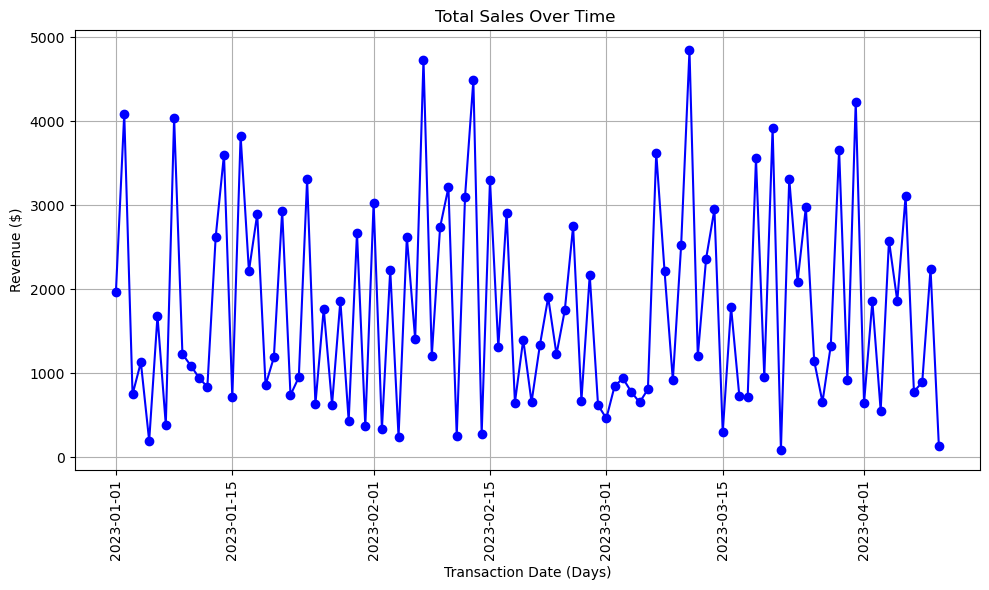

In [83]:


# Ensure Transaction_Date is in datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Group by Date and Calculate Total Revenue
sales_over_time = data.groupby('Transaction_Date')['Revenue'].sum().reset_index()

# Plot Total Sales Over Time
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['Transaction_Date'], sales_over_time['Revenue'], marker='o', linestyle='-', color='b')

# Customize the Plot
plt.title('Total Sales Over Time ')
plt.xlabel('Transaction Date (Days)')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

# Show the Plot
plt.show()


In [84]:
data

,Transaction_ID,Customer_Name,Product,Category,Quantity_Sold,Unit_Price,Transaction_Date,Store_Location,Revenue
0,T0001,Customer_7,Tablet,Electronics,3,657.0,2023-01-01,New York,1971.0
1,T0002,Customer_20,Headphones,Electronics,5,818.0,2023-01-02,Houston,4090.0
2,T0003,Customer_15,Tablet,Electronics,2,374.0,2023-01-03,Houston,748.0
3,T0004,Customer_11,Tablet,Electronics,2,565.0,2023-01-04,Phoenix,1130.0
4,T0005,Customer_8,Laptop,Electronics,3,65.0,2023-01-05,New York,195.0
...,...,...,...,...,...,...,...,...,...
95,T0096,Customer_12,Tablet,Electronics,4,778.0,2023-04-06,Chicago,3112.0
96,T0097,Customer_2,Laptop,Electronics,2,391.0,2023-04-07,Houston,782.0
97,T0098,Customer_1,Laptop,Accessories,2,446.0,2023-04-08,Phoenix,892.0
98,T0099,Customer_16,Headphones,Accessories,3,748.0,2023-04-09,Houston,2244.0


In [85]:
grouped_data = data.groupby(['Store_Location', 'Product'])['Quantity_Sold'].sum().reset_index() # Group the data that will be used


top_products = grouped_data.loc[grouped_data.groupby('Store_Location')['Quantity_Sold'].idxmax()] # Find the top-selling product in each Store_Location


print("Top-selling product in each store:") # Display the recommendations
print(top_products)

Top-selling product in each store:
   Store_Location     Product  Quantity_Sold
4         Chicago      Tablet             13
9         Houston      Tablet             27
11    Los Angeles      Laptop             17
15       New York  Headphones             15
21        Phoenix      Laptop             20
